IMPORT

In [3]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [4]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bao13\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Bao13\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
data_path = "../../data/txt/"

Choisir une décennie

In [6]:
DECADE = '1940'

Etape 2: Effectuez un clustering des documents de la décennie choisie.

In [7]:
## Charger tous les  fichiers de la décennie et en créer une liste de textes
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]




In [8]:
# Fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [9]:
# Vectoriser les documents à l'aide de TF-IDF
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Ulb\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [29]:
# Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents
N_CLUSTERS = 3
km_model = KMeans(n_clusters=N_CLUSTERS)
clusters = km_model.fit_predict(tfidf_vectors)
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

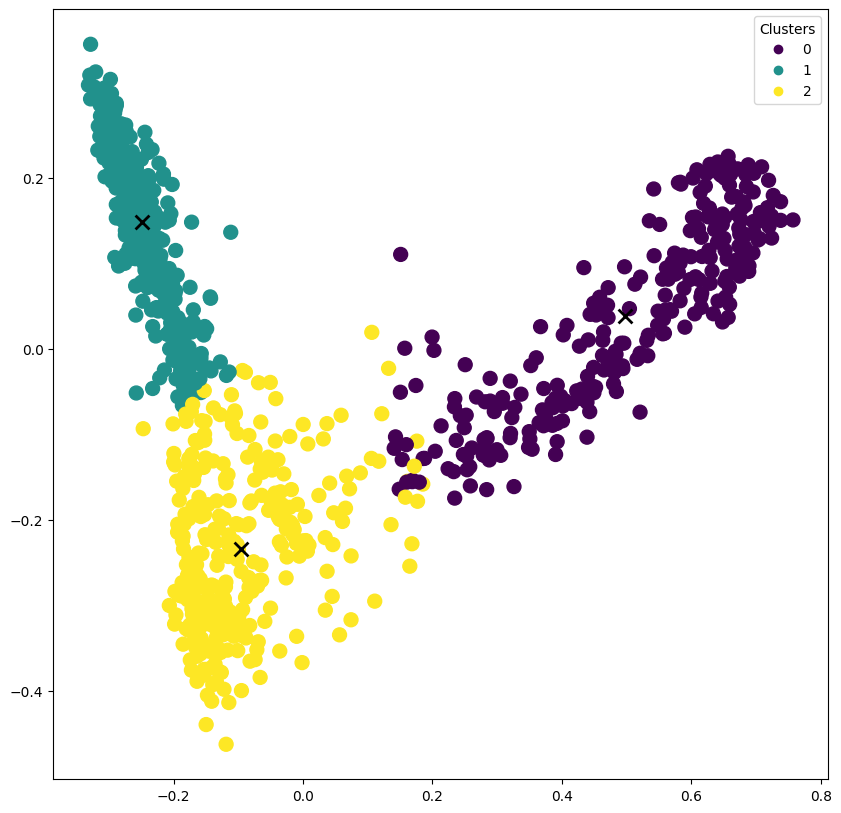

In [30]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

Etape 3: Interprétation (rapport) et extraction de mots clés

In [31]:
#Extraction des mots clés pour chaque cluster

terms = np.array(vectorizer.get_feature_names_out())

centers = km_model.cluster_centers_

keywords_per_cluster = {}

for i in range(N_CLUSTERS):
    top_idx = centers[i].argsort()[::-1][:20]
    keywords = terms[top_idx]
    keywords_per_cluster[i] = keywords
    print(f"\nCluster {i}")
    print(", ".join(keywords))


Cluster 0
dem, rossel, ag, ecr, ecrire, ec, vend, vendre, ec.ag.rossel, n®, louer, cherche, app, ag.rossel, mod, trav, pet, ach, villa, conf

Cluster 1
gouvernement, ministre, politique, troupes, allemands, allemagne, etats-unis, britannique, forces, berlin, front, allemande, armée, militaire, janvier, soviétique, allemand, allemandes, parti, déclaré

Cluster 2
p.s, cap, match, notaire, course, bat, admis, division, équipe, ca, points, mod, championnat, mètres, mutuel, etude, champion, juillet, 5., km
